### Setting up Python imports

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter, MultipleLocator, FixedLocator
from sklearn.preprocessing import MinMaxScaler

# Implementation analysis
---
### Importing CSV file

In [26]:
# Load the CSV file
df = pd.read_csv('data/results.csv')

print(df)

   student_id group    task1    task2    task3  grade1  grade2  grade3
0           1    se  0:13:53  0:41:31  0:58:56    2.00     2.0     2.0
1           2    se  0:16:15  0:25:30  0:51:07    2.00     2.0     2.0
2           3    se  0:31:30  1:04:06  1:25:52    1.75     2.0     1.5
3           4    ba  0:11:28  1:36:34  1:42:13    1.50     1.5     2.0
4           5    ba  0:17:06  1:38:11  1:48:03    1.00     1.5     2.0
5           6    ba  0:17:41  1:18:26  1:30:34    1.50     1.0     2.0


### Fromating DataFrame object

In [27]:
# Modifying time columns from string to timedetlas for calculation
time_cols = ['task1', 'task2', 'task3']
df[time_cols] = df[time_cols].apply(pd.to_timedelta)

# Creating a new column for total time
df["total_time"] = df["task3"].dt.total_seconds()

# Modifying previous time columns to hold the actual time it took to complete the task
df["task3"] = (df["task3"] - df["task2"]).dt.total_seconds()
df["task2"] = (df["task2"] - df["task1"]).dt.total_seconds()
df["task1"] = df["task1"].dt.total_seconds()

# Averaging for total experiment grade
grade_cols = ['grade1', 'grade2', 'grade3']
df["avg_grade"] = df[grade_cols].mean(axis=1).round(2)

print(df)

   student_id group   task1   task2   task3  grade1  grade2  grade3  \
0           1    se   833.0  1658.0  1045.0    2.00     2.0     2.0   
1           2    se   975.0   555.0  1537.0    2.00     2.0     2.0   
2           3    se  1890.0  1956.0  1306.0    1.75     2.0     1.5   
3           4    ba   688.0  5106.0   339.0    1.50     1.5     2.0   
4           5    ba  1026.0  4865.0   592.0    1.00     1.5     2.0   
5           6    ba  1061.0  3645.0   728.0    1.50     1.0     2.0   

   total_time  avg_grade  
0      3536.0       2.00  
1      3067.0       2.00  
2      5152.0       1.75  
3      6133.0       1.67  
4      6483.0       1.50  
5      5434.0       1.50  


### Creating scatter-plots (task-time vs. score)

In [28]:
# Separating the two groups
df_se = df[df['group'] == 'se']
df_ba = df[df['group'] == 'ba']

print(df_se)
print(df_ba)

   student_id group   task1   task2   task3  grade1  grade2  grade3  \
0           1    se   833.0  1658.0  1045.0    2.00     2.0     2.0   
1           2    se   975.0   555.0  1537.0    2.00     2.0     2.0   
2           3    se  1890.0  1956.0  1306.0    1.75     2.0     1.5   

   total_time  avg_grade  
0      3536.0       2.00  
1      3067.0       2.00  
2      5152.0       1.75  
   student_id group   task1   task2  task3  grade1  grade2  grade3  \
3           4    ba   688.0  5106.0  339.0     1.5     1.5     2.0   
4           5    ba  1026.0  4865.0  592.0     1.0     1.5     2.0   
5           6    ba  1061.0  3645.0  728.0     1.5     1.0     2.0   

   total_time  avg_grade  
3      6133.0       1.67  
4      6483.0       1.50  
5      5434.0       1.50  


In [29]:
# Helper function seconds to H:M:S format
def sec_to_hms(n, pos):
    h = int(n // 3600)
    m = int((n % 3600) // 60)
    s = int(n % 60)
    return f'{h:d}:{m:02d}:{s:02d}'

def sec_to_min(n, pos):
    m = int((n % 3600) // 60)
    s = int(n % 60)
    return f'{m:d}:{s:02d}'

# Setting formatter
min_formatter = FuncFormatter(sec_to_min)
time_formatter = FuncFormatter(sec_to_hms)

### Ploting Task 1 students comparison

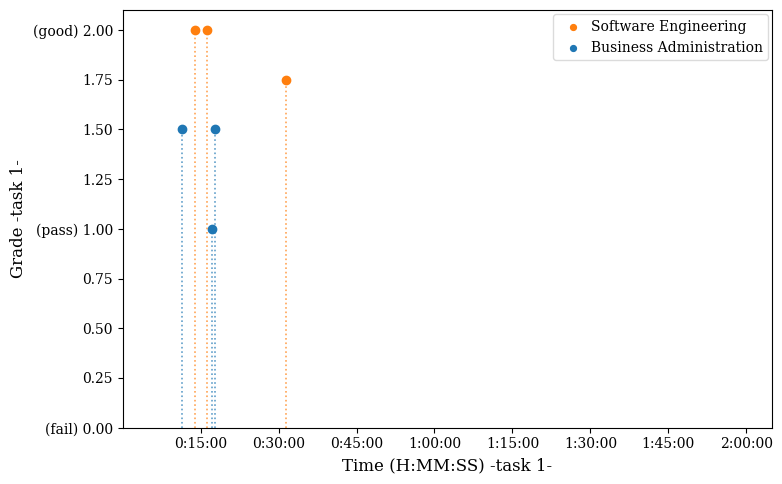

In [30]:
# Extracting SE data
x_se = df_se['task1']
y_se = df_se['grade1']
# Extracting BA data
x_ba = df_ba['task1']
y_ba = df_ba['grade1']

# Plotting the scatter
plt.figure(figsize=(8,5))

# Plotting SE group with orange
plt.scatter(x = x_se, y = y_se, color = 'tab:orange', label='Software Engineering')
# Plotting BA group with blue
plt.scatter(x = x_ba, y = y_ba, color = 'tab:blue', label='Business Administration')

# Formating plot
ax = plt.gca()

# Setting the x‐ and y‐limits
ax.set_xlim(0*60, 125*60)
ax.set_ylim(0, 2.10)

# Drawting the lines
xmin = ax.get_xlim()[0]
for xi, yi in zip(x_se, y_se):
    ax.vlines(xi, 0, yi,
              colors='tab:orange',
              linestyles='dotted',
              alpha=0.7)
    # ax.hlines(yi, xmin, xi,
    #           colors='tab:orange',
    #           linestyles='dotted',
    #           alpha=0.7)

for xi, yi in zip(x_ba, y_ba):
    ax.vlines(xi, 0, yi,
              colors='tab:blue',
              linestyles='dotted',
              alpha=0.7)
    # ax.hlines(yi, xmin, xi,
    #           colors='tab:blue',
    #           linestyles='dotted',
    #           alpha=0.7)

# Setting x-axis ticks
markers = [i for i in range(15, 121, 15)]
all_x = [m * 60 for m in markers]
ax.set_xticks(all_x)
# Formating the x-axis
ax.xaxis.set_major_formatter(time_formatter)

# Setting y-axis ticks
ax.set_yticks([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2])
# Formating the y-axis
ax.set_yticklabels(['(fail) 0.00', '0.25', '0.50', '0.75', '(pass) 1.00', '1.25', '1.50', '1.75', '(good) 2.00'], fontsize=10)


# Setting up the font
plt.rc('font', family='serif', size=12)
plt.rc('axes', titlesize=14, labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10, title_fontsize=11)
plt.rc('lines', linewidth=1.2, markersize=6)
# plt.style.use('seaborn-whitegrid')

# Formating the figure
# plt.title("Task 1: Completion Time & Grade SE vs. BA")
plt.xlabel("Time (H:MM:SS) -task 1-")
plt.ylabel("Grade -task 1-")
plt.legend(
    loc="upper right",
    fontsize='small',          # smaller text
    markerscale=0.7,           # shrink marker symbols
    handletextpad=0.3,         # less space between marker & text
    borderaxespad=0.3,         # less padding around legend
    framealpha=0.7,             # semi‑transparent background
)
plt.tight_layout()

# Save figure
plt.savefig('images/scatter_task1.png')
plt.show()

### Ploting Task 2 students comparison

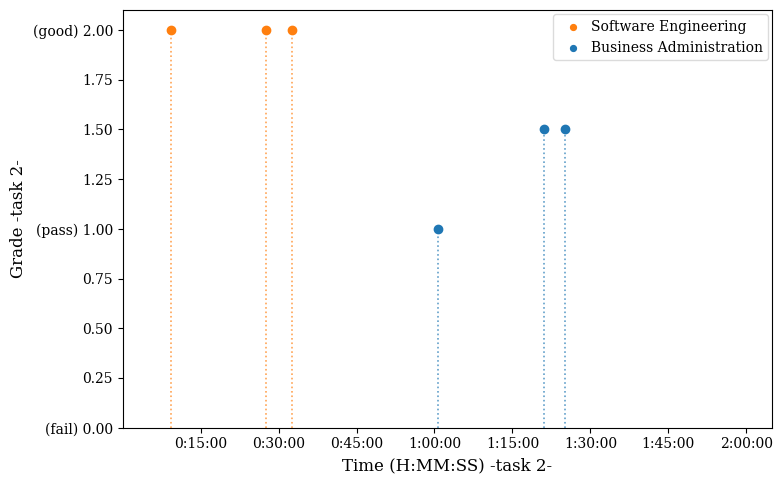

In [31]:
# Extracting SE data
x_se = df_se['task2']
y_se = df_se['grade2']
# Extracting BA data
x_ba = df_ba['task2']
y_ba = df_ba['grade2']

# Plotting the scatter
plt.figure(figsize=(8,5))

# Plotting SE group with orange
plt.scatter(x = x_se, y = y_se, color = 'tab:orange', label='Software Engineering')
# Plotting BA group with blue
plt.scatter(x = x_ba, y = y_ba, color = 'tab:blue', label='Business Administration')

# Formating plot
ax = plt.gca()

# Setting the x‐ and y‐limits
ax.set_xlim(0*60, 125*60)
ax.set_ylim(0, 2.10)

# Drawting the lines
xmin = ax.get_xlim()[0]
for xi, yi in zip(x_se, y_se):
    ax.vlines(xi, 0, yi,
              colors='tab:orange',
              linestyles='dotted',
              alpha=0.7)
    # ax.hlines(yi, xmin, xi,
    #           colors='tab:orange',
    #           linestyles='dotted',
    #           alpha=0.7)

for xi, yi in zip(x_ba, y_ba):
    ax.vlines(xi, 0, yi,
              colors='tab:blue',
              linestyles='dotted',
              alpha=0.7)
    # ax.hlines(yi, xmin, xi,
    #           colors='tab:blue',
    #           linestyles='dotted',
    #           alpha=0.7)

# Setting x-axis ticks
markers = [i for i in range(15, 121, 15)]
all_x = [m * 60 for m in markers]
ax.set_xticks(all_x)
# Formating the x-axis
ax.xaxis.set_major_formatter(time_formatter)

# Setting y-axis ticks
ax.set_yticks([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2])
# Formating the y-axis
ax.set_yticklabels(['(fail) 0.00', '0.25', '0.50', '0.75', '(pass) 1.00', '1.25', '1.50', '1.75', '(good) 2.00'], fontsize=10)


# Setting up the font
plt.rc('font', family='serif', size=12)
plt.rc('axes', titlesize=14, labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10, title_fontsize=11)
plt.rc('lines', linewidth=1.2, markersize=6)
# plt.style.use('seaborn-whitegrid')

# Formating the figure
# plt.title("Task 1: Completion Time & Grade SE vs. BA")
plt.xlabel("Time (H:MM:SS) -task 2-")
plt.ylabel("Grade -task 2-")
plt.legend(
    loc="upper right",
    fontsize='small',          # smaller text
    markerscale=0.7,           # shrink marker symbols
    handletextpad=0.3,         # less space between marker & text
    borderaxespad=0.3,         # less padding around legend
    framealpha=0.7,             # semi‑transparent background
)
plt.tight_layout()

# Save figure
plt.savefig('images/scatter_task2.png')
plt.show()

### Ploting Task 3 students comparison

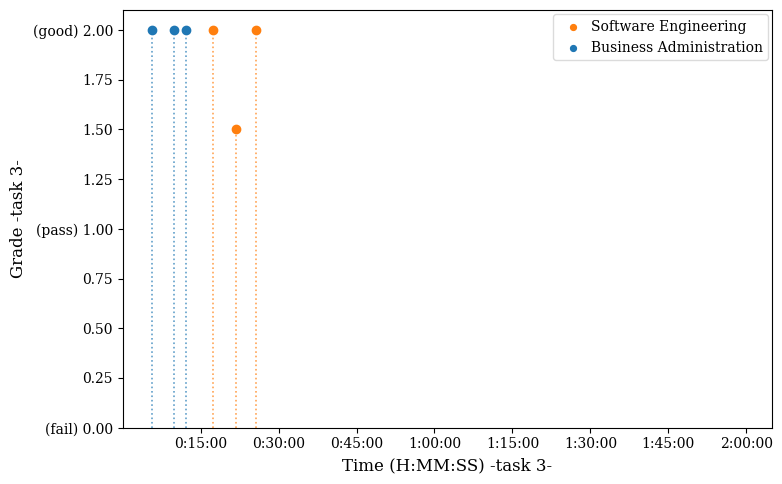

In [32]:
# Extracting SE data
x_se = df_se['task3']
y_se = df_se['grade3']
# Extracting BA data
x_ba = df_ba['task3']
y_ba = df_ba['grade3']

# Plotting the scatter
plt.figure(figsize=(8,5))

# Plotting SE group with orange
plt.scatter(x = x_se, y = y_se, color = 'tab:orange', label='Software Engineering')
# Plotting BA group with blue
plt.scatter(x = x_ba, y = y_ba, color = 'tab:blue', label='Business Administration')

# Formating plot
ax = plt.gca()

# Setting the x‐ and y‐limits
ax.set_xlim(0*60, 125*60)
ax.set_ylim(0, 2.10)

# Drawting the lines
xmin = ax.get_xlim()[0]
for xi, yi in zip(x_se, y_se):
    ax.vlines(xi, 0, yi,
              colors='tab:orange',
              linestyles='dotted',
              alpha=0.7)
    # ax.hlines(yi, xmin, xi,
    #           colors='tab:orange',
    #           linestyles='dotted',
    #           alpha=0.7)

for xi, yi in zip(x_ba, y_ba):
    ax.vlines(xi, 0, yi,
              colors='tab:blue',
              linestyles='dotted',
              alpha=0.7)
    # ax.hlines(yi, xmin, xi,
    #           colors='tab:blue',
    #           linestyles='dotted',
    #           alpha=0.7)

# Setting x-axis ticks
markers = [i for i in range(15, 121, 15)]
all_x = [m * 60 for m in markers]
ax.set_xticks(all_x)
# Formating the x-axis
ax.xaxis.set_major_formatter(time_formatter)

# Setting y-axis ticks
ax.set_yticks([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2])
# Formating the y-axis
ax.set_yticklabels(['(fail) 0.00', '0.25', '0.50', '0.75', '(pass) 1.00', '1.25', '1.50', '1.75', '(good) 2.00'], fontsize=10)


# Setting up the font
plt.rc('font', family='serif', size=12)
plt.rc('axes', titlesize=14, labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10, title_fontsize=11)
plt.rc('lines', linewidth=1.2, markersize=6)
# plt.style.use('seaborn-whitegrid')

# Formating the figure
# plt.title("Task 1: Completion Time & Grade SE vs. BA")
plt.xlabel("Time (H:MM:SS) -task 3-")
plt.ylabel("Grade -task 3-")
plt.legend(
    loc="upper right",
    fontsize='small',          # smaller text
    markerscale=0.7,           # shrink marker symbols
    handletextpad=0.3,         # less space between marker & text
    borderaxespad=0.3,         # less padding around legend
    framealpha=0.7,             # semi‑transparent background
)
plt.tight_layout()

# Save figure
plt.savefig('images/scatter_task3.png')
plt.show()

### Ploting Overall student comparison

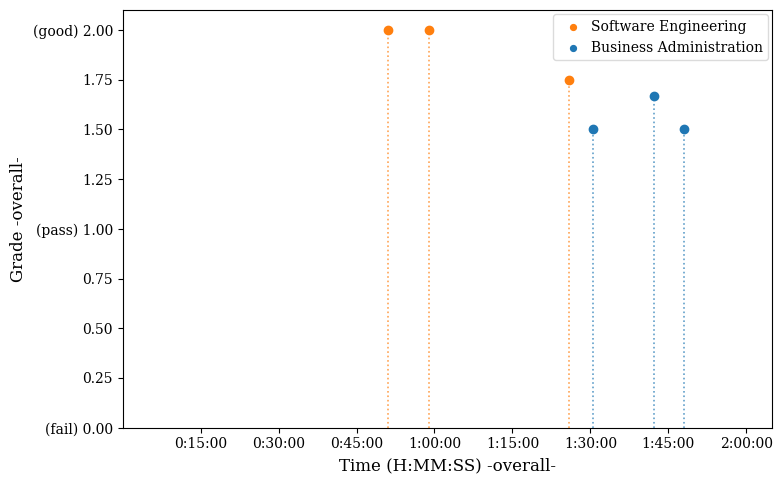

In [33]:
# Extracting SE data
x_se = df_se['total_time']
y_se = df_se['avg_grade']
# Extracting BA data
x_ba = df_ba['total_time']
y_ba = df_ba['avg_grade']

# Plotting the scatter
plt.figure(figsize=(8,5))

# Plotting SE group with orange
plt.scatter(x = x_se, y = y_se, color = 'tab:orange', label='Software Engineering')
# Plotting BA group with blue
plt.scatter(x = x_ba, y = y_ba, color = 'tab:blue', label='Business Administration')

# Formating plot
ax = plt.gca()

# Setting the x‐ and y‐limits
ax.set_xlim(0*60, 125*60)
ax.set_ylim(0, 2.10)

# Drawting the lines
xmin = ax.get_xlim()[0]
for xi, yi in zip(x_se, y_se):
    ax.vlines(xi, 0, yi,
              colors='tab:orange',
              linestyles='dotted',
              alpha=0.7)
    # ax.hlines(yi, xmin, xi,
    #           colors='tab:orange',
    #           linestyles='dotted',
    #           alpha=0.7)

for xi, yi in zip(x_ba, y_ba):
    ax.vlines(xi, 0, yi,
              colors='tab:blue',
              linestyles='dotted',
              alpha=0.7)
    # ax.hlines(yi, xmin, xi,
    #           colors='tab:blue',
    #           linestyles='dotted',
    #           alpha=0.7)

# Setting x-axis ticks
markers = [i for i in range(15, 121, 15)]
all_x = [m * 60 for m in markers]
ax.set_xticks(all_x)
# Formating the x-axis
ax.xaxis.set_major_formatter(time_formatter)

# Setting y-axis ticks
ax.set_yticks([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2])
# Formating the y-axis
ax.set_yticklabels(['(fail) 0.00', '0.25', '0.50', '0.75', '(pass) 1.00', '1.25', '1.50', '1.75', '(good) 2.00'], fontsize=10)


# Setting up the font
plt.rc('font', family='serif', size=12)
plt.rc('axes', titlesize=14, labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10, title_fontsize=11)
plt.rc('lines', linewidth=1.2, markersize=6)
# plt.style.use('seaborn-whitegrid')

# Formating the figure
# plt.title("Task 1: Completion Time & Grade SE vs. BA")
plt.xlabel("Time (H:MM:SS) -overall-")
plt.ylabel("Grade -overall-")
plt.legend(
    loc="upper right",
    fontsize='small',          # smaller text
    markerscale=0.7,           # shrink marker symbols
    handletextpad=0.3,         # less space between marker & text
    borderaxespad=0.3,         # less padding around legend
    framealpha=0.7,             # semi‑transparent background
)
plt.tight_layout()

# Save figure
plt.savefig('images/scatter_experiment.png')
plt.show()

### Ploting groups comparison (time)

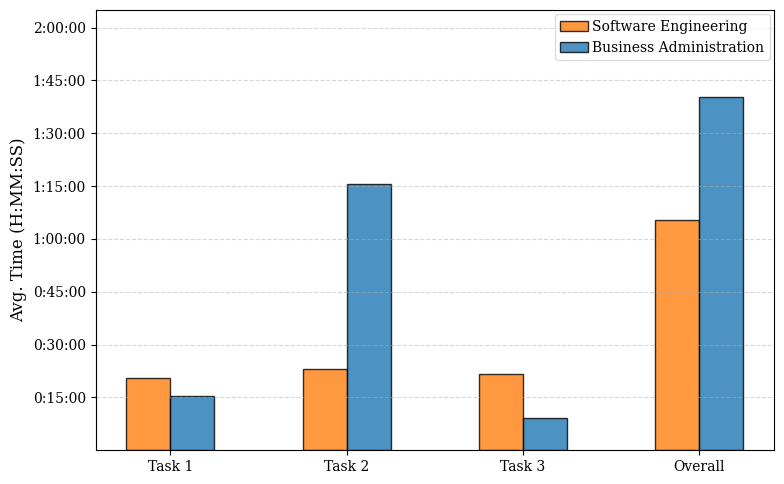

In [34]:
# Defining columns for variable extraction
cols = ['task1', 'task2', 'task3']
cols1 = ['task1', 'task2', 'task3', 'total_time']

# Extracting the data
# tasks = ['Task 1', 'Task 2', 'Task 3', 'Overall', 'Avg. per task']
tasks = ['Task 1', 'Task 2', 'Task 3', 'Overall']
se_time = df_se[cols1].mean().round(2).tolist()
ba_time = df_ba[cols1].mean().round(2).tolist()

# avg_per_task_se = float(df_se[cols].mean().mean().round(2))
# se_time.append(avg_per_task_se)
# avg_per_task_ba = float(df_ba[cols].mean().mean().round(2))
# ba_time.append(avg_per_task_ba)

ind   = np.arange(len(tasks))
width = 0.25

# Plotting the bar chart
plt.figure(figsize=(8,5))

# SE bars (shift left)
plt.bar(ind - width/2,
        se_time,
        width,
        capsize=4,
        label='Software Engineering',
        color='tab:orange',
        edgecolor='black',
        alpha=0.8)

# BA bars (shift right)
plt.bar(ind + width/2,
        ba_time,
        width,
        capsize=4,
        label='Business Administration',
        color='tab:blue',
        edgecolor='black',
        alpha=0.8)

# Formatting the plot
ax = plt.gca()

# Setting y‐limits
ax.set_ylim(0*60, 125*60)

# Setting x-axis ticks
markers = [i for i in range(15, 121, 15)]
all_y = [m * 60 for m in markers]
ax.set_yticks(all_y)
# Formating the x-axis
ax.yaxis.set_major_formatter(time_formatter)

# Labels, ticks, legend
plt.xticks(ind, tasks)
plt.ylabel("Avg. Time (H:MM:SS)")
plt.legend(
    loc="upper right",
    fontsize='small',          # smaller text
    markerscale=0.7,           # shrink marker symbols
    handletextpad=0.3,         # less space between marker & text
    borderaxespad=0.3,         # less padding around legend
    framealpha=0.7,             # semi‑transparent background
)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Save figure
plt.savefig('images/bar_time.png')
plt.show()

### Ploting groups comparison (grade)

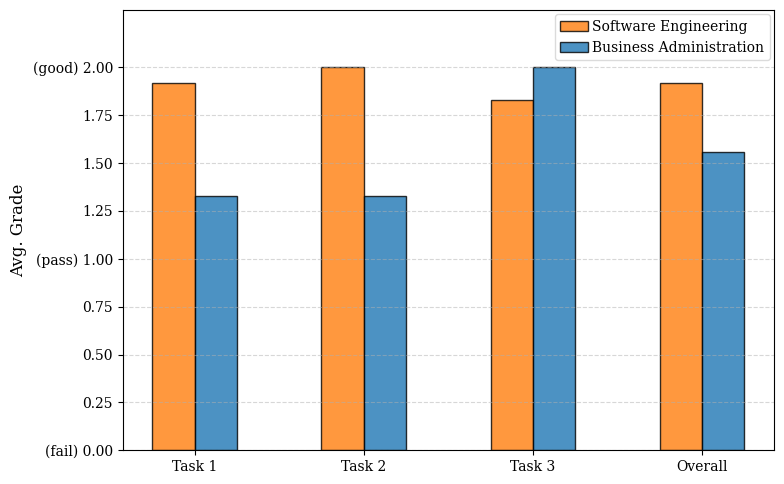

In [35]:
# Defining columns for variable extraction
cols1 = ['grade1', 'grade2', 'grade3', 'avg_grade']

# Extracting the data
tasks = ['Task 1', 'Task 2', 'Task 3', 'Overall']
se_grade = df_se[cols1].mean().round(2).tolist()
ba_grade = df_ba[cols1].mean().round(2).tolist()

ind   = np.arange(len(tasks))
width = 0.25

# Plotting the bar chart
plt.figure(figsize=(8,5))

# SE bars (shift left)
plt.bar(ind - width/2,
        se_grade,
        width,
        capsize=4,
        label='Software Engineering',
        color='tab:orange',
        edgecolor='black',
        alpha=0.8)

# BA bars (shift right)
plt.bar(ind + width/2,
        ba_grade,
        width,
        capsize=4,
        label='Business Administration',
        color='tab:blue',
        edgecolor='black',
        alpha=0.8)

# Formatting the plot
ax = plt.gca()

# Setting y‐limits
ax.set_ylim(0, 2.3)
# Setting y-axis ticks
ax.set_yticks([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2])
# Formating the y-axis
ax.set_yticklabels(['(fail) 0.00', '0.25', '0.50', '0.75', '(pass) 1.00', '1.25', '1.50', '1.75', '(good) 2.00'], fontsize=10)


# Labels, ticks, legend
plt.xticks(ind, tasks)
plt.ylabel("Avg. Grade")
plt.legend(
    loc="upper right",
    fontsize='small',          # smaller text
    markerscale=0.7,           # shrink marker symbolsW
    handletextpad=0.3,         # less space between marker & text
    borderaxespad=0.3,         # less padding around legend
    framealpha=0.7,             # semi‑transparent background
)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Save figure
plt.savefig('images/bar_grade.png')
plt.show()

### Ploting groups comparison (performance)

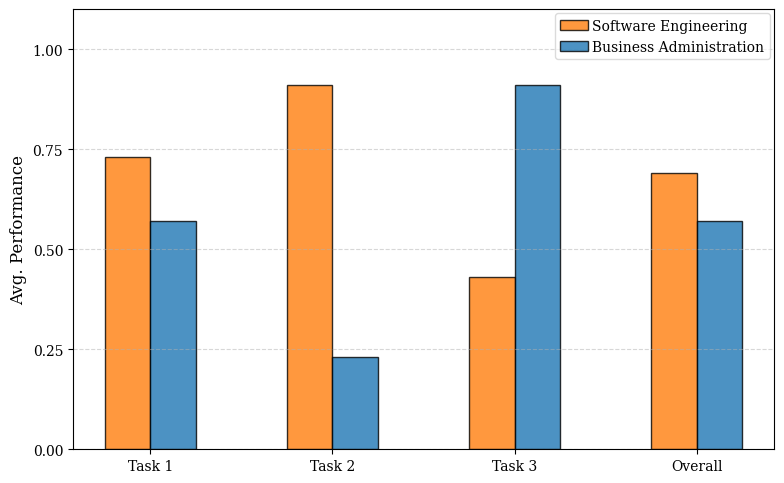

In [36]:
cols_to_normalize = ['task1', 'task2', 'task3', 'grade1', 'grade2', 'grade3']
normalized_cols = [f'{c}_n' for c in cols_to_normalize]
inverted_cols = normalized_cols[:3]

# Normalizing values

# Method 1
scaler = MinMaxScaler(feature_range=(0, 1))
df[normalized_cols] = scaler.fit_transform(df[cols_to_normalize])

# Inverting normalized time values
df[inverted_cols] = 1 - df[inverted_cols]

# Computing task performance
performance_cols = ['perf1', 'perf2', 'perf3']
for i in range(len(performance_cols)):
    df[performance_cols[i]] = (df[f'task{i+1}_n'] + df[f'grade{i+1}_n']) / 2

df_agg_perf = df[['group'] + performance_cols].groupby('group').mean().round(2)
df_agg_perf['perf_overall'] = df_agg_perf.mean(axis=1)

# Defining columns for variable extraction
cols1 = ['perf1', 'perf2', 'perf3', 'perf_overall']

# Extracting the data
tasks = ['Task 1', 'Task 2', 'Task 3', 'Overall']
se_perf = df_agg_perf.loc['se'].tolist()
ba_perf = df_agg_perf.loc['ba'].tolist()

ind   = np.arange(len(tasks))
width = 0.25

# Plotting the bar chart
plt.figure(figsize=(8,5))

# SE bars (shift left)
plt.bar(ind - width/2,
        se_perf,
        width,
        capsize=4,
        label='Software Engineering',
        color='tab:orange',
        edgecolor='black',
        alpha=0.8)

# BA bars (shift right)
plt.bar(ind + width/2,
        ba_perf,
        width,
        capsize=4,
        label='Business Administration',
        color='tab:blue',
        edgecolor='black',
        alpha=0.8)

# Formatting the plot
ax = plt.gca()

# Setting y‐limits
ax.set_ylim(0, 1.1)
# Setting y-axis ticks
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
# Formating the y-axis
ax.set_yticklabels(['0.00', '0.25', '0.50', '0.75', '1.00'], fontsize=10)


# Labels, ticks, legend
plt.xticks(ind, tasks)
plt.ylabel("Avg. Performance")
plt.legend(
    loc="upper right",
    fontsize='small',          # smaller text
    markerscale=0.7,           # shrink marker symbolsW
    handletextpad=0.3,         # less space between marker & text
    borderaxespad=0.3,         # less padding around legend
    framealpha=0.7,             # semi‑transparent background
)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Save figure
plt.savefig('images/bar_performance.png')
plt.show()